In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/kaggle/input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv')
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [6]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Fill missing values
df['director'].fillna('Unknown', inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['date_added'].fillna(method='ffill', inplace=True)

# Remove rows with missing rating/duration
df.dropna(subset=['rating', 'duration'], inplace=True)

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# View clean dataset
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

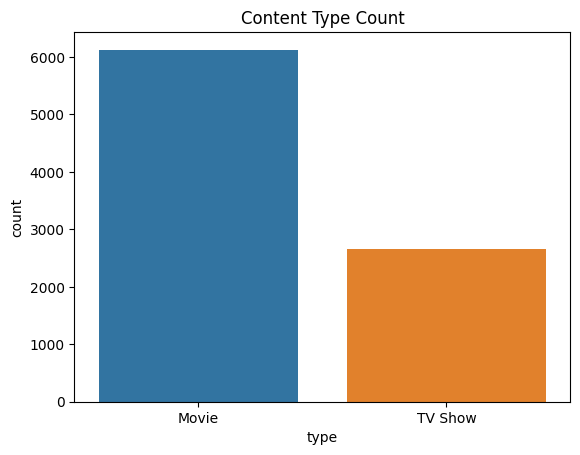

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of Movies vs TV Shows
sns.countplot(x='type', data=df)
plt.title('Content Type Count')
plt.show()

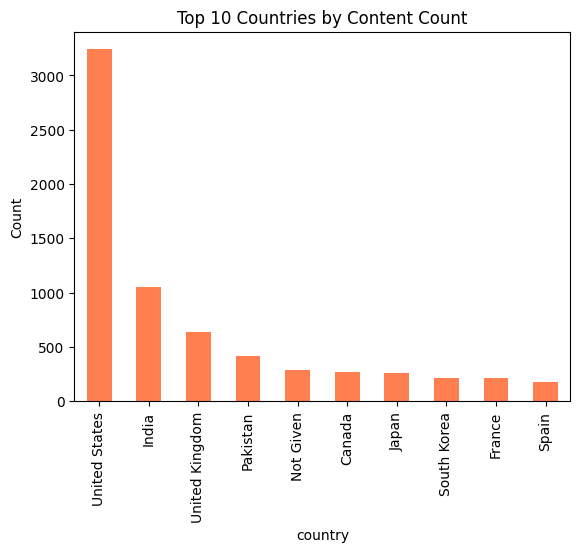

In [8]:
# Top 10 countries
df['country'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Countries by Content Count')
plt.ylabel('Count')
plt.show()

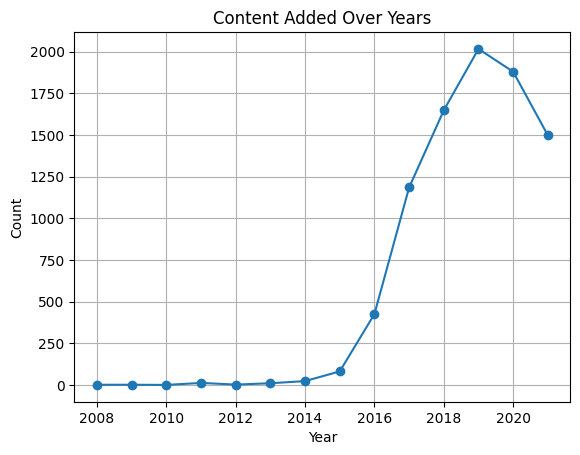

In [9]:
# Content added over years
df['year_added'] = df['date_added'].dt.year
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Content Added Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Use simple columns
data = df[['release_year', 'rating', 'duration', 'type']].copy()

# Clean duration column
data['duration'] = data['duration'].str.extract('(\d+)').astype(int)

# Encode rating and type
le_rating = LabelEncoder()
le_type = LabelEncoder()
data['rating'] = le_rating.fit_transform(data['rating'])
data['type'] = le_type.fit_transform(data['type'])

In [11]:
# Train-test split
X = data.drop('type', axis=1)
y = data['type']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le_type.classes_))

Accuracy: 0.9965870307167235
              precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1238
     TV Show       0.99      1.00      0.99       520

    accuracy                           1.00      1758
   macro avg       0.99      1.00      1.00      1758
weighted avg       1.00      1.00      1.00      1758



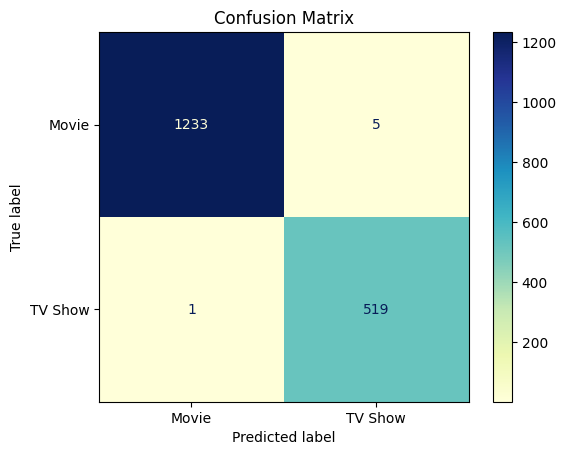

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_type.classes_)
disp.plot(cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.show()